Importation des librairies

In [1]:
import pandas as pd
import string
import os
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image, ImageOps
from sklearn.cluster import KMeans
import nltk
from nltk import FreqDist
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Visualisation du csv

In [2]:
df = pd.read_csv('cleaned.csv', error_bad_lines=False)
df

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_16160\758296984.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('cleaned.csv', error_bad_lines=False)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,"[""http://img5a.flixcart.com/image/sticker/h/4/...",False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,"[""http://img5a.flixcart.com/image/sticker/c/v/...",False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,"[""http://img6a.flixcart.com/image/sticker/w/c/...",False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
df.product_category_tree.tolist()

['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
 '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
 '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
 '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
 '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
 '["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]',
 '["Watches >> Wrist Watches >> C

Prétraitement des données textes pour obtenir un jeu de données exploitables

In [5]:
# Initialiser le lemmatiseur
lemmatizer = WordNetLemmatizer()

# Définir une fonction de lemmatisation pour une phrase
def lemmatize_sentence(sentence):
    # Tokeniser la phrase en mots
    tokens = nltk.word_tokenize(sentence)
    # Lemmatiser chaque mot
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    # Rejoindre les mots en une phrase
    lemmatized_sentence = " ".join(lemmatized_tokens)
    return lemmatized_sentence

# Définir une fonction pour déterminer la partie du discours d'un mot pour le lemmatiseur
def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [6]:
df_clean = df.assign(
    product_name_cleaned = df['product_name'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word.lower(), get_wordnet_pos(word)) for word in x.translate(str.maketrans('', '', string.punctuation)).split() if word not in {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'he', 'him', 'she', 'and', 'din', 'wrist', 'combo'}])),
    product_category_tree_cleaned = df['product_category_tree'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word.lower(), get_wordnet_pos(word)) for word in x.translate(str.maketrans('', '', string.punctuation)).split() if word not in {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'he', 'him', 'she', 'and', 'din', 'wrist', 'combo'}])),
    description_cleaned = df['description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word.lower(), get_wordnet_pos(word)) for word in x.translate(str.maketrans('', '', string.punctuation)).split() if word not in {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'he', 'him', 'she', 'and', 'din', 'wrist', 'combo'}]))
)

df_clean.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_name_cleaned,product_category_tree_cleaned,description_cleaned
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",elegance polyester multicolor abstract eyelet ...,home furnish curtain accessory curtain eleganc...,key feature of elegance polyester multicolor a...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",sathiyas cotton bath towel,baby care baby bath skin baby bath towel sathi...,specification of sathiyas cotton bath towel 3 ...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",eurospa cotton terry face towel set,baby care baby bath skin baby bath towel euros...,key feature of eurospa cotton terry face towel...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",santosh royal fashion cotton print king size d...,home furnish bed linen bedsheets santosh royal...,key feature of santosh royal fashion cotton pr...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",jaipur print cotton floral king size double be...,home furnish bed linen bedsheets jaipur print ...,key feature of jaipur print cotton floral king...


In [7]:
df_clean['product_category_tree_cleaned'].unique()[0:30]

array(['home furnish curtain accessory curtain elegance polyester multicolor abstract eyelet do',
       'baby care baby bath skin baby bath towel sathiyas baby bath towel sathiyas cotton bath towel 3 bath towel red y',
       'baby care baby bath skin baby bath towel eurospa baby bath towel eurospa cotton terry face towel set 20 piece fa',
       'home furnish bed linen bedsheets santosh royal fashion bedsheets santosh royal fashion cotton print king size',
       'home furnish bed linen bedsheets jaipur print bedsheets jaipur print cotton floral king size double bed',
       'watch wrist watch maserati time wrist watch',
       'watch wrist watch camerii wrist watch',
       'watch wrist watch t star wrist watch',
       'watch wrist watch alfajr wrist watch',
       'watch wrist watch tag heuer wrist watch',
       'watch wrist watch calibro wrist watch',
       'watch wrist watch cartier wrist watch',
       'watch wrist watch lois caron wrist watch',
       'watch wrist watch tita

In [8]:
# définir une fonction lambda pour extraire la sous-catégorie
extract_category = lambda x: x.split(">>")[0].strip(' "').strip(']["')

# appliquer la fonction à la colonne 'product_category_tree'
df_clean['category_label'] = df_clean['product_category_tree'].apply(extract_category)
df_clean.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_name_cleaned,product_category_tree_cleaned,description_cleaned,category_label
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",elegance polyester multicolor abstract eyelet ...,home furnish curtain accessory curtain eleganc...,key feature of elegance polyester multicolor a...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",sathiyas cotton bath towel,baby care baby bath skin baby bath towel sathi...,specification of sathiyas cotton bath towel 3 ...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",eurospa cotton terry face towel set,baby care baby bath skin baby bath towel euros...,key feature of eurospa cotton terry face towel...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",santosh royal fashion cotton print king size d...,home furnish bed linen bedsheets santosh royal...,key feature of santosh royal fashion cotton pr...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",jaipur print cotton floral king size double be...,home furnish bed linen bedsheets jaipur print ...,key feature of jaipur print cotton floral king...,Home Furnishing


In [9]:
category_count = df_clean.groupby(['category_label'])['uniq_id'].nunique().sort_values(ascending=False)
print(category_count)

category_label
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: uniq_id, dtype: int64


In [10]:
from sklearn.preprocessing import normalize

# Initialiser le vectoriseur pour le bag-of-words
vectorizer = CountVectorizer(min_df=5, stop_words='english')

# Appliquer le vectoriseur aux descriptions nettoyées
bag_of_words = vectorizer.fit_transform(df_clean['description_cleaned'])

# Normaliser les fréquences des mots dans chaque document
bag_of_words_normalized = normalize(bag_of_words)

# Transformer en DataFrame
bag_of_words_df_clean = pd.DataFrame(bag_of_words_normalized.toarray(), columns=vectorizer.get_feature_names())

bag_of_words_df_clean.head()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,11,12,121,1299,13,14,141,...,woman,wood,wooden,work,world,wrap,year,yellow,yes,youre
0,0.0,0.00000,0.053300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0533,0.0,0.00000,0.00000,0.000000,0.0
1,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.084215,0.0,0.0,0.0,0.0000,0.0,0.00000,0.16843,0.084215,0.0
2,0.0,0.04714,0.094281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.047140,0.0,0.0,0.0,0.0000,0.0,0.04714,0.00000,0.000000,0.0
3,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0000,0.0,0.00000,0.00000,0.052632,0.0
4,0.0,0.00000,0.087039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0000,0.0,0.00000,0.00000,0.043519,0.0


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range=(1,2))

# Appliquer le vectorizer sur la colonne 'description_cleaned'
tfidf_description = tfidf_vectorizer.fit_transform(df_clean['description_cleaned'])

# Transformer les résultats en dataframe
tfidf_description = pd.DataFrame(tfidf_description.toarray(), columns=tfidf_vectorizer.get_feature_names())

tfidf_description.head()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,00 from,10,10 cm,100,100 cotton,100 percent,100 pure,11,12,...,your moment,your own,your room,your skin,your style,youre,youre sure,yourself,yourself our,yourself to
0,0.0,0.0,0.000000,0.0,0.037837,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.055516,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.044886,0.0,0.078934,0.046295,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.056746,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.066434,0.038964,0.0,0.0,0.0,0.0,...,0.0,0.0,0.048736,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


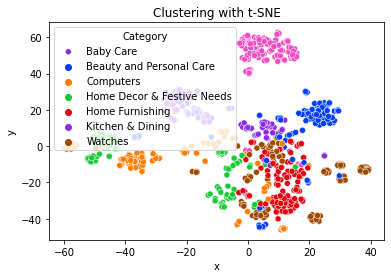

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans

# Convertir les étiquettes de catégorie en valeurs numériques
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_clean['category_label'])

# Réduire les dimensions à l'aide de t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(tfidf_description)

# Clustering avec k-means
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(tfidf_description)

# Afficher la visualisation des clusters avec t-SNE
sns.scatterplot(x='x', y='y', hue=labels, data=pd.DataFrame({'x': X_tsne[:, 0], 'y': X_tsne[:, 1], 'labels': labels}), palette='bright')
plt.title('Clustering with t-SNE')
plt.legend(title='Category', labels=label_encoder.inverse_transform(range(len(label_encoder.classes_))))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Diviser l'ensemble de données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(bag_of_words_df_clean, df_clean['category_label'], test_size=0.2, random_state=42)

# Entraîner un modèle de classification
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8523809523809524


In [15]:
# Diviser l'ensemble de données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(tfidf_description, df_clean['category_label'], test_size=0.2, random_state=42)

# Entraîner un modèle de classification
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8952380952380953


In [16]:
from gensim.models import Word2Vec

# Construction d'une liste de phrases
sentences = [sentence.split() for sentence in df_clean['description_cleaned'].tolist()]

# Entraînement du modèle Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [17]:
# Fonction pour vectoriser chaque élément
def text_vector(model, doc):
    # Créer un tableau vide de la taille de la dimension du modèle
    doc_vector = np.zeros(model.vector_size)
    # Compter le nombre de mots dans le document
    num_words = 0
    # Pour chaque mot dans élément, ajouter son vecteur à la somme
    for word in doc:
         try:
            doc_vector += model.wv[word]
            num_words += 1
         except KeyError:
            continue
    # Si aucun mot n'a été trouvé dans le modèle, retourner le vecteur nul
    if num_words == 0:
        return np.zeros(model.vector_size)
    # Diviser la somme par le nombre de mots pour obtenir la moyenne
    doc_vector /= num_words
    return doc_vector

# Vectoriser chaque document dans l'ensemble de données
word2vec_vectors = np.array([text_vector(model, doc) for doc in sentences])

In [18]:
word2vec_vectors

array([[-0.03694055,  0.36608901,  0.19286713, ..., -0.39842879,
        -0.04647518, -0.45361323],
       [-0.20907171,  0.4433539 ,  0.06761614, ..., -0.38047126,
        -0.50018713, -0.6186552 ],
       [-0.04169317,  0.36190293,  0.16420715, ..., -0.38295546,
        -0.16590134, -0.45227871],
       ...,
       [ 0.29812462,  0.56551349,  0.05039207, ..., -0.38176267,
        -0.16426499, -0.13226844],
       [ 0.27975506,  0.56620893,  0.0554376 , ..., -0.38796603,
        -0.16643528, -0.14913932],
       [ 0.3224518 ,  0.60500054,  0.05598378, ..., -0.41101427,
        -0.16957562, -0.1413229 ]])

In [19]:
# Diviser les vecteurs en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(word2vec_vectors, df_clean['category_label'], test_size=0.2, random_state=42)

# Entraîner un modèle de classification
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of word2vec in category_label:", accuracy)

Accuracy of word2vec in category_label: 0.7047619047619048


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Entraîner un modèle de classification par forêt aléatoire
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'échantillon test
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of word2vec in category_label using RandomForest:", accuracy)

Accuracy of word2vec in category_label using RandomForest: 0.7904761904761904


In [21]:
# Entrainer un modèle de classification par arbre de décision
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of word2vec in category_label using DecisionTree:", accuracy)

Accuracy of word2vec in category_label using DecisionTree: 0.7047619047619048


In [22]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# Construction d'une liste de phrases
sentences = [sentence.split() for sentence in df_clean['description_cleaned'].tolist()]

# Entraînement du modèle Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=10, workers=4)

# Récupération des vecteurs de phrases
vectors = [model.wv[word] for word in model.wv.index_to_key]
vectors = np.array(vectors)

# Clustering avec K-Means
kmeans = KMeans(n_clusters=7, random_state=42).fit(vectors)

# Attribution des labels de cluster à chaque phrase
labels = kmeans.labels_

# Affichage des phrases dans chaque cluster
for i in range(len(set(labels))):
    print("Cluster ", i+1, ":")
    for j, sentence in enumerate(sentences):
        if labels[j] == i:
            print(" ".join(sentence))
    print()

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster  1 :
key feature of jaipur print cotton floral king size double bedsheet 100 cottonjaipur print cotton floral king size double bedsheet 1 bed sheet 2 pillow cover white price r 998 this nice bed sheet make up of 100 cotton to give comfort this bed sheet be hand print this bedsheet give nice look to your room and it fast colour good quality give this bedsheet long lifespecifications of jaipur print cotton floral king size double bedsheet 1 bed sheet 2 pillow cover white general machine washable yes brand jaipur print type flat model name jaipur117 material cotton thread count 140 model id jaipur117 fabric care machinewash do not bleach size king color white warranty waranty of the product only for manufacturing defect only product will exchange onle when it be not use returne it origional pack dimension flat sheet width 86 inch 220 cm fit sheet width 0 cm pillow cover width 17 inch 45 cm pillow cover length 29 inch 75 cm weight 900 g fit sheet depth 0 cm fit sheet length 0 cm fl

IndexError: index 959 is out of bounds for axis 0 with size 959

In [23]:
# Création d'une liste de mots clés pour chaque cluster
cluster_keywords = []
for i in range(len(set(labels))):
    # Récupération des indices des phrases dans le cluster
    indices = [j for j in range(len(labels)) if labels[j] == i]
    # Création d'une liste de mots pour toutes les phrases dans le cluster
    words = [word for sentence in [sentences[j] for j in indices if j < len(sentences)] for word in sentence]
    # Calcul de la fréquence de chaque mot dans le cluster
    freq_dist = FreqDist(words)
    # Élimination des mots fréquents dans tous les clusters
    common_words = set([word for word, freq in freq_dist.most_common(50)])
    for word in common_words:
        freq_dist.pop(word, None)
    # Sélection des 10 mots les plus fréquents dans le cluster
    cluster_keywords.append([word for word, freq in freq_dist.most_common(10)])
        
# Affichage des mots clés pour chaque cluster
for i, keywords in enumerate(cluster_keywords):
    print("Cluster ", i+1, ":")
    print(keywords)
    print()

Cluster  1 :
['quality', 'detail', 'adapter', 'and', 'best', 'an', 'love', 'general', 'give', 'can']

Cluster  2 :
['yes', 'caffeine', 'stoneware', 'pack', 'short', 'wm64', 'price', 'work', 'touch', 'design']

Cluster  3 :
['top', 'conditioner', 'otg', 'enable', 'android', 'smart', 'phone', 'gift', 'lip', 'material']

Cluster  4 :
['that', 'use', 'or', 'print', 'woman', 'inch', 'discount', 'general', 'box', 'towel']

Cluster  5 :
['at', 'akup', 'by', 'can', 'give', 'buy', 'only', 'love', 'one', 'perfect']

Cluster  6 :
['one', 'general', 'warranty', 'by', 'sale', 'and', 'shipping', 'brand', 'x', 'battery']

Cluster  7 :
['guarantee', 'r', 'by', 'light', 'showpiece', 'name', '2', 'width', 'india', 'bulb']



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


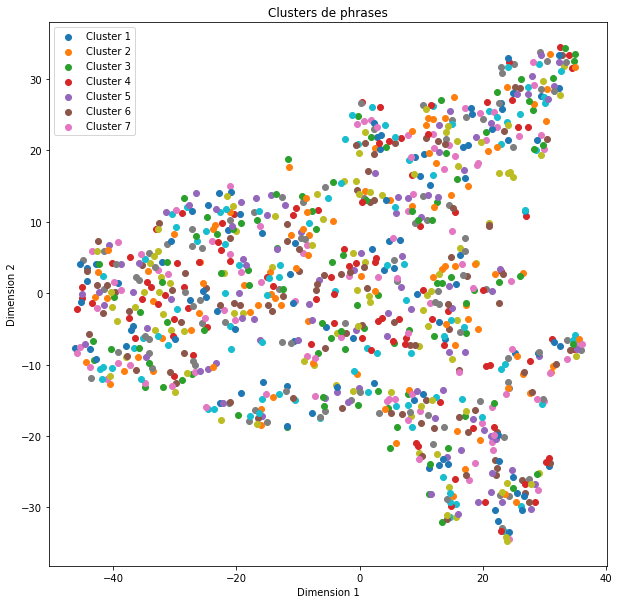

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(vectors)

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(X_tsne)):
    ax.scatter(X_tsne[i, 0], X_tsne[i, 1], cmap='viridis')
    
label_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Clusters de phrases')
plt.legend(label_names, loc='best')
plt.show()

In [25]:
from transformers import AutoTokenizer, AutoModel
import torch

# Charger le modèle BERT
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Obtenir les embeddings pour chaque mot avec BERT
sentences = [' '.join(sentence.split()) for sentence in df_clean['description_cleaned'].tolist()]
encoded_inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_outputs = model(**encoded_inputs)
embeddings = model_outputs.last_hidden_state[:, 0, :].numpy()

# Clustering avec KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(embeddings)

# Afficher les points de chaque cluster avec une couleur différente
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(embeddings)

plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=kmeans.labels_)
plt.colorbar()
plt.show()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 12>:13                                                                            │
│                                                                                                  │
│   10 sentences = [' '.join(sentence.split()) for sentence in df_clean['description_cleaned'].    │
│   11 encoded_inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt'    │
│   12 with torch.no_grad():                                                                       │
│ ❱ 13 │   model_outputs = model(**encoded_inputs)                                                 │
│   14 embeddings = model_outputs.last_hidden_state[:, 0, :].numpy()                               │
│   15                                                                                             │
│   16 # Clustering avec KMeans                                                                    │
│                                                                                                  │
│ C:\Users\utilisateur\anaconda3\lib\site-packages\torch\nn\modules\module.py:1194 in _call_impl   │
│                                                                                                  │
│   1191 │   │   # this function, and just call forward.                                           │
│   1192 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1193 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1194 │   │   │   return forward_call(*input, **kwargs)                                         │
│   1195 │   │   # Do not call functions when jit is used                                          │
│   1196 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1197 │   │   if self._backward_hooks or _global_backward_hooks:                                │
│                                                                                                  │
│ C:\Users\utilisateur\anaconda3\lib\site-packages\transformers\models\bert\modeling_bert.py:1020  │
│ in forward                                                                                       │
│                                                                                                  │
│   1017 │   │   │   inputs_embeds=inputs_embeds,                                                  │
│   1018 │   │   │   past_key_values_length=past_key_values_length,                                │
│   1019 │   │   )                                                                                 │
│ ❱ 1020 │   │   encoder_outputs = self.encoder(                                                   │
│   1021 │   │   │   embedding_output,                                                             │
│   1022 │   │   │   attention_mask=extended_attention_mask,                                       │
│   1023 │   │   │   head_mask=head_mask,                                                          │
│                                                                                                  │
│ C:\Users\utilisateur\anaconda3\lib\site-packages\torch\nn\modules\module.py:1194 in _call_impl   │
│                                                                                                  │
│   1191 │   │   # this function, and just call forward.                                           │
│   1192 │   │   if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks o  │
│   1193 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1194 │   │   │   return forward_call(*input, **kwargs)                                         │
│   1195 │   │   # Do not call functions when jit is used                                          │
│   1196 │   │   full_backward_hooks, non_full_backward_hooks

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

# Charger le module USE
use_module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_module = hub.load(use_module_url)

# Obtenir les embeddings des mots-clés avec USE
common_word_embeddings = use_module(' '.join(common_words)).numpy()

# Réduire la dimensionnalité à 2 avec t-SNE
tsne = TSNE(n_components=2, perplexity=5, n_iter=2000, init='random', random_state=6)
common_word_embeddings = tsne.fit_transform(common_word_embeddings)

kmeans = KMeans(n_clusters=7)
kmeans.fit(common_word_embeddings)

# Visualiser les embeddings avec t-SNE
sns.set()
plt.figure(figsize=(10, 10))
sns.scatterplot(x=common_word_embeddings[:,0], y=common_word_embeddings[:,1], hue=common_words, legend='full')
plt.title("t-SNE visualization of word embeddings using USE")
plt.show()